# GUROBI

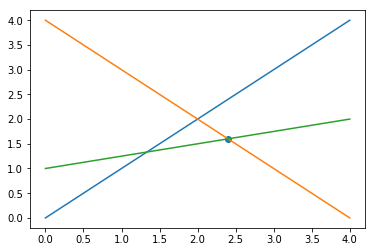

In [3]:
%matplotlib inline
import gurobipy as grb
import matplotlib.pyplot as plt

m = grb.Model()
v0 = m.addVar()
v1 = m.addVar()
m.update()

m.addConstr(v0 - v1 <= 4)
m.addConstr(v0 + v1 <= 4)
m.addConstr(-0.25 * v0 + v1 <= 1)
m.setObjective(v1, grb.GRB.MAXIMIZE)
m.params.outputflag = 0

m.optimize()

plt.plot([0, 4], [0, 4])
plt.plot([4, 0], [0, 4])
plt.plot([0, 4], [1, 2])
plt.scatter(v0.x, v1.x)
plt.show()

# Google OR tools

Number of variables = 2
Number of constraints = 2
Optimal objective value = 23

x = 3
y = 2
3.0


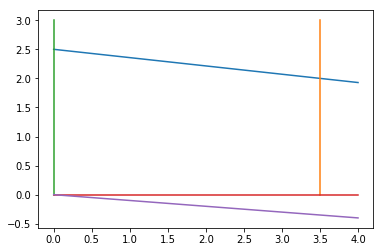

In [29]:
from ortools.linear_solver import pywraplp

# Instantiate a mixed-integer solver, naming it SolveIntegerProblem.
solver = pywraplp.Solver('SolveIntegerProblem',
                       pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

x = solver.IntVar(0.0, solver.infinity(), 'x')
y = solver.IntVar(0.0, solver.infinity(), 'y')

# x + 7 * y <= 17.5
c1 = solver.Constraint(-solver.infinity(), 17.5)
c1.SetCoefficient(x, 1)
c1.SetCoefficient(y, 7)

# x <= 3.5
c2 = solver.Constraint(-solver.infinity(), 3.5)
c2.SetCoefficient(x, 1)
c2.SetCoefficient(y, 0)

# Maximize x + 10 * y.
o = solver.Objective()
o.SetCoefficient(x, 1)
o.SetCoefficient(y, 10)
o.SetMaximization()

result_status = solver.Solve()

assert result_status == pywraplp.Solver.OPTIMAL

assert solver.VerifySolution(1e-7, True)

print('Number of variables =', solver.NumVariables())
print('Number of constraints =', solver.NumConstraints())

# The objective value of the solution.
print('Optimal objective value = %d' % solver.Objective().Value())
print()
# The value of each variable in the solution.
variable_list = [x, y]

for variable in variable_list:
    print('%s = %d' % (variable.name(), variable.solution_value()))
    
const1 = lambda x: (17.5 - x)/7


print(x.solution_value())

ofunc = lambda x: -x /10


plt.plot([0, 4], [const1(0), const1(4)])
plt.plot([3.5, 3.5], [0, 3])
plt.plot([0, 0], [0, 3])
plt.plot([0, 4], [0, 0])
plt.plot([0, 4], [ofunc(0), ofunc(4)])

plt.show()

# Graph cut

In [32]:
solver = pywraplp.Solver('SolveAssignmentProblemMIP',
                           pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)
cost = [[90, 76, 75, 70],
      [35, 85, 55, 65],
      [125, 95, 90, 105],
      [45, 110, 95, 115],
      [60, 105, 80, 75],
      [45, 65, 110, 95]]

team1 = [0, 2, 4]
team2 = [1, 3, 5]
team_max = 2

num_workers = len(cost)
num_tasks = len(cost[1])
x = {}

for i in range(num_workers):
    for j in range(num_tasks):
        x[i, j] = solver.BoolVar('x[%i,%i]' % (i, j))

# Objective
solver.Minimize(solver.Sum([cost[i][j] * x[i,j] for i in range(num_workers)
                                              for j in range(num_tasks)]))

# Constraints

# Each worker is assigned to at most 1 task.

for i in range(num_workers):
    solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) <= 1)

# Each task is assigned to exactly one worker.

for j in range(num_tasks):
    solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1)

# Each team takes on two tasks.

solver.Add(solver.Sum([x[i, j] for i in team1 for j in range(num_tasks)]) <= team_max)
solver.Add(solver.Sum([x[i, j] for i in team2 for j in range(num_tasks)]) <= team_max)
sol = solver.Solve()

print('Total cost = ', solver.Objective().Value())
print()
for i in range(num_workers):
    for j in range(num_tasks):
          if x[i, j].solution_value() > 0:
                print('Worker %d assigned to task %d.  Cost = %d' % (
                      i,
                      j,
                      cost[i][j]))

print()
print("Time = ", solver.WallTime(), " milliseconds")

Total cost =  250.0

Worker 0 assigned to task 2.  Cost = 75
Worker 1 assigned to task 0.  Cost = 35
Worker 4 assigned to task 3.  Cost = 75
Worker 5 assigned to task 1.  Cost = 65

Time =  5  milliseconds


# Optimization

http://theory.stanford.edu/~trevisan/cs261/